# Visualization

Tools for data analysis such as pandas take advantage of being able to quickly and iteratively provide the user to take data, process it and quickly visualize the meaning.

#### Setting up Jupyter Notebook

In [6]:
# import pandas,numpy and datetime
import numpy as np
import pandas as pd
# needed for representing dates and times
import datetime
from datetime import datetime

# set some pandas options for controlling output
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)

# used for seeding random number sequences
seedval = 111111

# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt
# we want our plots inline
%matplotlib inline

## Plotting basics with pandas

pandas library performs data manipulation. The visualisation of data in pandas data structures us handed off by pandas to other robust visualisation libraries that are part of the Python ecosystem most commonly matplotlib.

pandas tightly integrates with matplotlib and by doing this it is very simple to go directly from pandas data to a matplotlib visualisation without having to work with intermediate forms of data.

## Creating time series charts with .plot()

Visualising a time series in pandas is as simple as calling .plot() on a DataFrame or Series object.

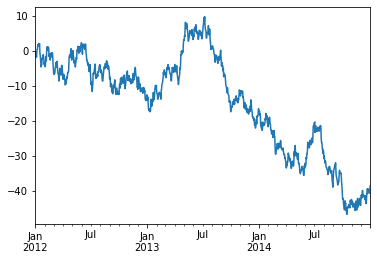

In [7]:
# generate random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),index=pd.date_range('2012-01-01','2014-12-31'))
walk_ts = s.cumsum()
# this plot the walk
walk_ts.plot(); # semicolon character suppresses the generation of Jupyter out tag and trace information


In [8]:
# tells pandas plots to use a default style
# which has a background fill
pd.options.display.mpl_style = 'default'
walk_ts.plot();

OptionError: 'You can only set the value of existing options'

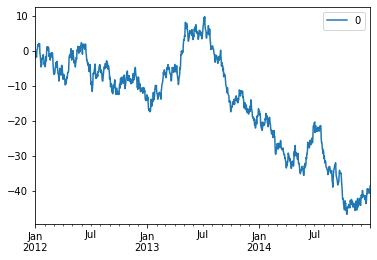

In [9]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [10]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096,2),index=walk_ts.index,columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

<AxesSubplot:>

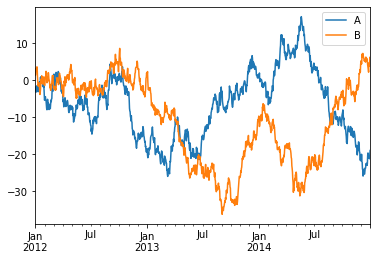

In [11]:
# plot the DataFrame, which will plot a line
# for each column with a legend
walk_df.plot()

By default .plot() method plots dates in the x-axis. If you want to use one column of DataFrame as the labels on the x axis of the plot instead of index labels you can use the x and y parameters to the .plot() method.

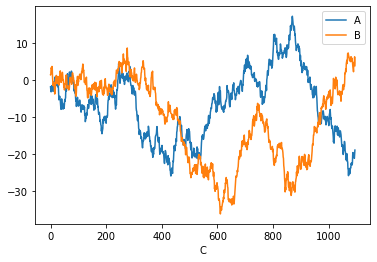

In [12]:
# copy the walk
df2 = walk_df.copy()
# add a column C which is 0..1096
df2['C'] = pd.Series(np.arange(0,len(df2)),index=df2.index)
# instead of dates on x-axis use the 'C' column
# which will label the axis with 0..1000
df2.plot(x='C',y=['A','B']);

### Adorning and styling your time-series plot

#### Adding a title and changing axis labels

In [ ]:
# create a time-series chart with a title and specific
# x and y axes labels
# title is set in .plot method as a parameter
walk_df.plot(title='Sample Chart')
# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

## Specifying the legend content and position
To change the text used in the legend you can use the ax object returned from the .plot() method to modify the text using its .legend() method. The ax object is an AxesSubplot object, which is a representation of the elements of the plot, that can be used to change various aspects of the plot before it is generated.

In [ ]:
# change the legend items to be different
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Sample Chart')
# this sets the legend labels
ax.legend(['1','2']);

In [ ]:
# change the position of  the legend
ax = walk_df.plot(title='Sample Chart')
# this sets the legend labels
ax.legend(['1','2'],loc='upper center');

In [ ]:
# omit the legend by using legend = False
walk_df.plot(title='Sample Chart',legend=False);

## Specifying line colors, styles, thickness and markers

pandas automatically sets the colors of each series on any chart. If you would like to specify your own color, you can do so by supplying style code to the style parameter of the plot function. 

It is also possible to specify the color using a hexadecimal RGB code of the ##RRGGBB format. To demonstrate both options, the following example sets the color of the first series to green and second series to red using single digit code and hexadecimal code respectively.

In [ ]:
# change the line colors of the plot
# use character code for the first line
# hex RGB for the second
walk_df.plot(style=['g','#FF0000']);

Line styles can be specified using a line style code.

In [ ]:
# show off different line styles
t = np.arange(0.,5.,0.2)
legend_labels = ['Solid','Dashed','Dotted','Dot-dashed','Points']
line_style = pd.DataFrame({0: t,
                          1: t**1.5,
                          2: t**2.0,
                          3: t**2.5,
                          4: t**3.0})
# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-','g--','b:','m-.','k:'])
# set the legend
ax.legend(legend_labels, loc='upper left')

The thickness of lines can be specified using the lw parameter of .plot()

In [ ]:
# regenerate the plot, specifying color and line style
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-','g--','b:','m-.','k:'],lw=3)
# set the legend
ax.legend(legend_labels, loc='upper left')

Markers on a line can also be specified using abbreviations in the style code. 

In [ ]:
# redraw adding markers to the lines
ax = line_style.plot(style=['r-o','g--^','b:*','m-.D','k:o'],lw=3)
ax.legend(legend_labels,loc='upper left')

## Specifying tick mark locations and tick labels
We can retrieve the locations of the ticks that were generated on the x axis using the plt .xticks() method. This method returns two values, the location and the actual labels.

In [ ]:
# add a simple plot to use to examing ticks
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks,labels = plt.xticks()
ticks

This array contains the locations of the ticks in units of the values along the x-axis. pandas has decided that a range of 0 through 4 and an interval of 0.5 is appropriate. If we want to use other locations we can provide these by passing them to plt.xtricks() as a list.

In [ ]:
# resize x axis to (-1,5) and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1,6));

In [ ]:
# rename y axis tick labels to A,B,C,D and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0,5),list("ABCDE"));

## Formatting axes tick date labels using formatters
The formatting of axes labels whose underlying data types is datetime is performed using locators and formatters. Locators control the position of the ticks, and the formatters control the formatting of the labels.

To facilitate locating ticks and formatting labels based on dates, matplotlib provides several classes in maptplotlib.dates to help facilitate the process:
* MinuteLocator, HourLocator, DayLocator, WeekdayLocator, MonthLocator and YearLocator. These are specific locators coded to determine where ticks for each type of date field will be found on the axis.
* DateFormatter: This is a class that can be used to format date objects into labels on the axis.

By default, the default locator and formatter are AutoDateLocator and AutoDateFormatter respectively. You can change these by providing different objects to use the appropriate methods on the specific axis object.

In [ ]:
# plot Jan-Feb 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

The labels on the x axis of this plot have two series of labels, the minor and the major. The minor labels in this plot contain the day of the month, and the major contains the year and month. We can set locators and formatters for each of the minor and major levels.

In [ ]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator
# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()
# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0),interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

Note that the year is reported as 45. This unfortunately seems to be an issue between pandas and the matplotlib representation of values for the year.

So, it appears to create a plot with custom-date-based labels, we need to avoid the pandas .plot() and need to kick all the way down to using matplotlib.

In [ ]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so lets make a variable
walk_subset = walk_df['2014-01':'2014-02']
# this gets the plot so we can use it, we can ignore fig
fig,ax = plt.subplots()
# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(),walk_subset,'-')
# do the minor labels 
weekday_locator = WeekdayLocator(byweekday=(0),interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

In [ ]:
# this gets the plot so twe can use it, we can ignore fig
fig,ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(),walk_subset,'-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0),interval = 1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True,"minor") # turn on minor tick grid lines
ax.xaxis.grid(False,"major")# turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

The last demonstration of formatting we will use only the major labels but on a weekly basis and using a YYYY-MM-DD format. However because these would overlap, we will specify that they should be rotated to prevent the overlap. This is done using the fig.autofmt_xdate() function:

In [ ]:
# this get the plot so we can use it, we can ignore fig
fig,ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series

ax.plot_date(walk_subset.index.to_pydatetime(),walk_subset,'-')
ax.xaxis.grid(True,"major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
fig.autofmt_xdate();

## Common Plots used in statistical analyses

### Bar Plots

In [ ]:
# make a bar plot
# create a small series of 10 random values centered at 0.0
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# plot the bar chart
s.plot(kind='bar');

In [ ]:
# draw a multiple series bar chart
# generate 4 columns of 10 random values
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
# draw the multi-series bar chart
df2.plot(kind='bar');

In [ ]:
# horizontal stacked bar chart
df2.plot(kind='bar', stacked=True)

In [ ]:
# horizontal stacked bar chart
df2.plot(kind='barh',stacked=True);

### Histograms

Histograms are useful for visualising distributions of data.

In [ ]:
# create a histogram
np.random.seed(seedval)
# 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))
# draw the histogram
dfh.hist();

In [ ]:
# histogram again but with more bins
dfh.hist(bins=100);

In [ ]:
# generate a multiple histogram plot
# create DataFrame with 4 columns of 1000 random values
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000,4),columns=['a','b','c','d'])
# draw the chart
# there are four columns so pandas draws four histograms
dfh.hist();

In [ ]:
# directly use pyplot to overlay multiple histograms
# generate two distributions, each with a different
# mean and standard deviation
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# specify the bins (-10 to 10 with 100 bins)
bins = np.linspace(-10,10,100)

# generate plot x using plt.hist, 50% transparent
plt.hist(x, bins, alpha=0.5, label='x')
# generate plot y using plt.hist, 50% transparent
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right');

## Box and Whisker Charts

Box plots come from descriptive statistics and are a useful way of graphically depicting the distributions of cateogrical data using quartiles. Each box represents the values between the first and third quartiles of the data with a line across the box at the median. Each whisker reaches out to demonstrate the extent to five interquartile ranges.

In [ ]:
# create a box plot
# generate the series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# generate the plot
dfb.boxplot(return_type='axes');

## Area Plots
Area plots are used to represent cumulative totals over time, to demonstrate the change in trends over time among related attributes. They can also be "stacked" to demonstrate representative totals across all variables.

In [ ]:
# create a stacked area plot
# generate a 4-column data frame of random data
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10,4), columns=['a','b','c','d'])
# create the area plot
dfa.plot(kind='area');

In [ ]:
# do not stack the area plot
dfa.plot(kind="area",stacked=False)

## Scatter Plots
A scatter plot displays the correlation between a pair of variables. A scatter plot can be created from DataFrame using .plot() and specifying kind='scatter' as well as specifying the x and y columns from the DataFrame source:

In [ ]:
# generate a scatter plot of two series of normally
# distributed random values
# we would expect this to cluster around 0,0
np.random.seed(111111)
sp_df = pd.DataFrame(np.random.randn(10000,2),columns=['a','b'])
sp_df.plot(kind='scatter',x='a',y='b');

In [ ]:
# get Google stock data from 1/1/2011 to 12/31/2011
import pandas_datareader.data as web
stock_data = web.DataReader("GOOGL","yahoo",datetime(2011,1,1),datetime(2011,12,31))
# % change per day
delta = np.diff(stock_data["Adj Close"]) / stock_data["Adj Close"][:-1]
# this calculates the size of markers
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0]) ** 2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

# generate scatter plot
fig, ax = plt.subplots()
ax.scatter(delta[:-1],delta[1:],c=close,s=volume,alpha=0.5)

# add some labels and style
ax.set_xlabel(r'$\Delta_i$',fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and Percent Change')
ax.grid(True);

## Density Plot

A kernel density plot instead of being a pure empirical representation of the data, makes an attempt and estimates the true distribution of the data and hence smoothes it into a continuous plot.

In [ ]:
# create a kde density plot
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# generate the plot
s.hist(normed=True) # shows the bars
s.plot(kind='kde');

## Scatter plot matrix

A scatter plot matrix is a popular way of determining whether there is a linear correlation between multiple variables.

In [ ]:
# create a scatter plot matrix
# import this class
from pandas.tools.plotting import scatter_matrix
#import pandas.plotting.scatter_matrix
# generate DataFrame with 4 columns of 1000 random numbers
np.random.seed(111111)
df_spm = pd.DataFrame(np.random.randn(1000,4),columns=['a','b','c','d'])
# create the scatter matrix
scatter_matrix(df_spm, alpha=0.2, figsize=(6,6),diagonal='kde');

## Heatmaps
A heatmap is a graphical representation of data, where values within a matrix are represented by colors. This is an effective means to show relationships of values that are measured at the intersection of two variables, at each intersection of the rows and columns of the matrix.

A common scenario, is to have the values in the matrix normalized to 0.0 through 1.0 and heave the intersections between a row and column represent the correlation between the two variables. Values with less correlation (0.0) are the darkest and those with the highest correlation (1.0) are white.

In [ ]:
# create a heatmap
# start with data for the heatmap
s = pd.Series([0.0,0.1,0.2,0.3,0.4],['V','W','X','Y','Z'])
heatmap_data = pd.DataFrame({'A': s + 0.0,
                            'B': s + 0.1,
                            'C': s + 0.2,
                            'D': s + 0.3,
                            'E': s + 0.4,
                            'F': s + 0.5,
                            'G': s + 0.6
                            })
heatmap_data

In [ ]:
# generate the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar() # add the scale of color bars
# set the labels
plt.xticks(range(len(heatmap_data.columns)),heatmap_data.columns)
plt.yticks(range(len(heatmap_data)),heatmap_data.index);

## Multiple plots in a single chart

It is ofter usefult to contrast data by displaying multiple plots next to each other. To draw multiple subplots on a grid, we can make multiple calls to plt.

subplot2grid() each time passing the size of the grid the subplot is to be located on (shape=(height,width) and the location on the grid of the upper-left section of the subplot(loc=(row,column)). Each call to plt.subplot2grid() returns a different AxesSubplot object that can be used to reference the specific subplot and direct the rendering into.

In [ ]:
# create two subplots on the new plot using a 2x1 grid
# ax1 is the upper row
ax1 = plt.subplot2grid(shape=(2,1),loc=(0,0))
# ax2 is the lower row
ax2 = plt.subplot2grid(shape=(2,1),loc=(1,0))

In [ ]:
# layout sub plots on a 4 x 4 grid
# ax1 on top row, 4 columns wide
ax1 = plt.subplot2grid((4,4),(0,0),colspan=4)
# ax2 is row 2, left most and 2 columns wide
ax2 = plt.subplot2grid((4,4),(1,0),colspan=2)
# ax3 is 2 cols wide and 2 rows high, starting
# on second row and the third column
ax3 = plt.subplot2grid((4,4),(1,2),colspan=2, rowspan=2)
# ax4 1 high 1 wide in row 4 column 0
ax4 = plt.subplot2grid((4,4),(2,0))
# ax5 1 high 1 wide in row 4 column 1
ax5 = plt.subplot2grid((4,4),(2,1));

In [ ]:
# demonstrating drawing into specific subplots
# generate a layout of 2 rows 1 column
# create subplots one on each row
ax5 = plt.subplot2grid((2,1),(0,0))
ax6 = plt.subplot2grid((2,1),(1,0))
# plot column 0 of walk_df into top row of the grid
walk_df[[0]].plot(ax = ax5)
# and column 1 of walk_df into bottom row
walk_df[[1]].plot(ax = ax6);

In [ ]:
# draw the close on the top chart
top = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
top.plot(stock_data.index,stock_data['Close'],label='Close')
plt.title('Google Opening Stock Price - 2001')

# draw the volume chart on the bottom
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')

# set the size of the plot
plt.gcf().set_size_inches(15,8)